Primeras filas del dataset:
   movie_id                 credit_id department  gender     id         job  \
0       862  52fe4284c3a36847f8024f49  Directing       2   7879    Director   
1       862  52fe4284c3a36847f8024f4f    Writing       2  12891  Screenplay   
2       862  52fe4284c3a36847f8024f55    Writing       2      7  Screenplay   
3       862  52fe4284c3a36847f8024f5b    Writing       2  12892  Screenplay   
4       862  52fe4284c3a36847f8024f61    Writing       0  12893  Screenplay   

             name  
0   John Lasseter  
1     Joss Whedon  
2  Andrew Stanton  
3      Joel Cohen  
4    Alec Sokolow  

Tipos de datos:
movie_id       int64
credit_id     object
department    object
gender         int64
id             int64
job           object
name          object
dtype: object

Valores nulos por columna:
movie_id      0
credit_id     0
department    0
gender        0
id            0
job           0
name          0
dtype: int64


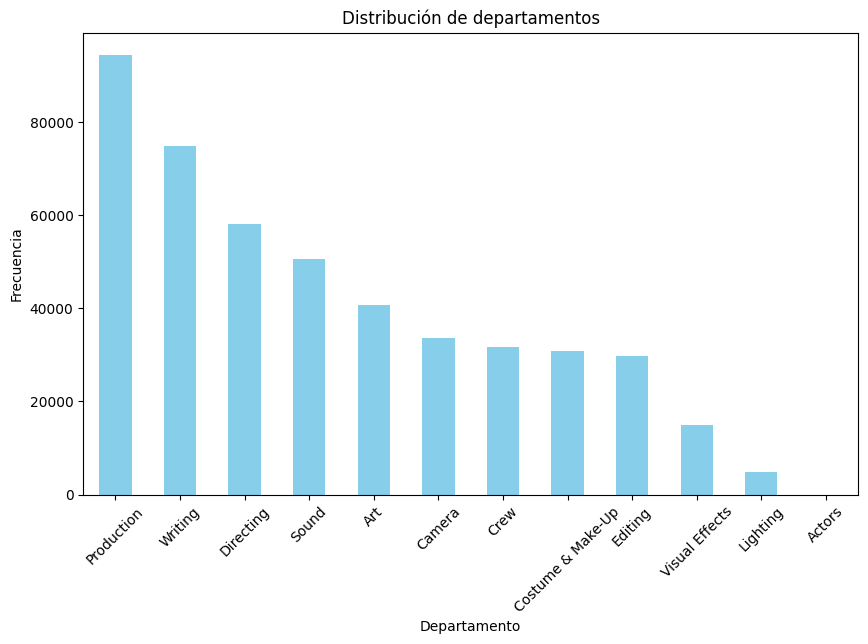

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10588\3449902075.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_df['gender_label'] = directors_df['gender'].map(gender_mapping)


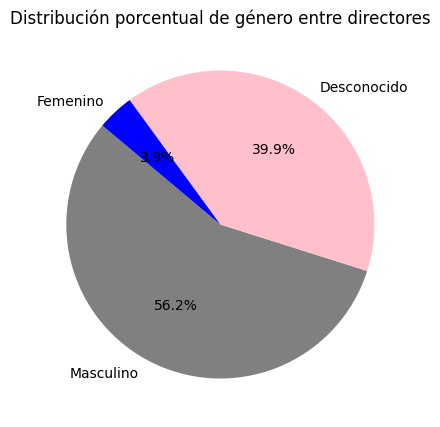

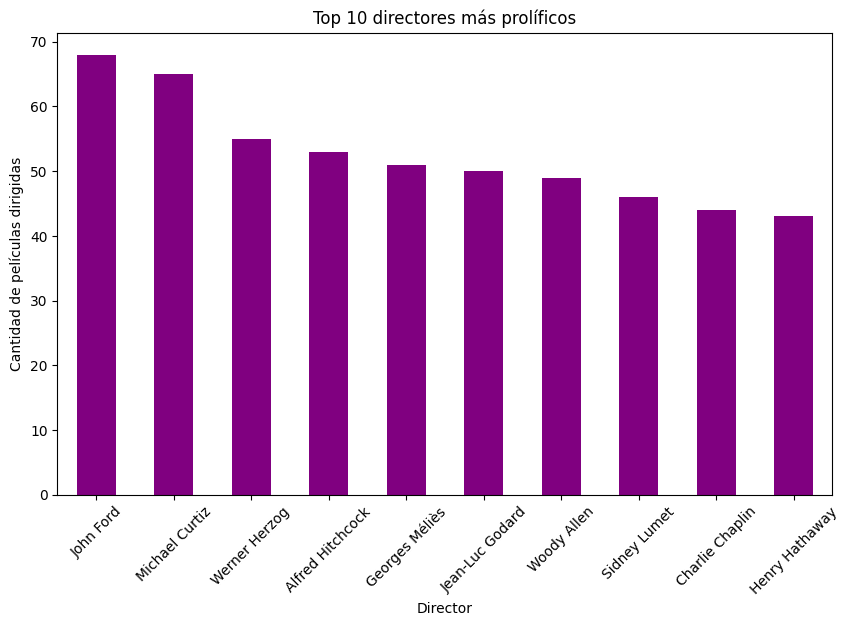

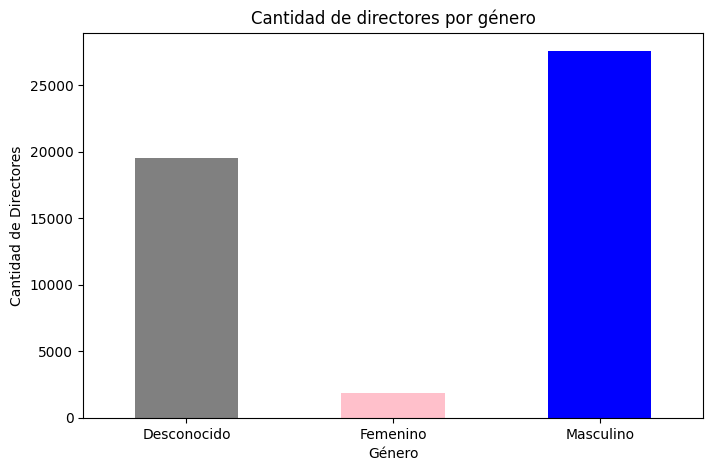

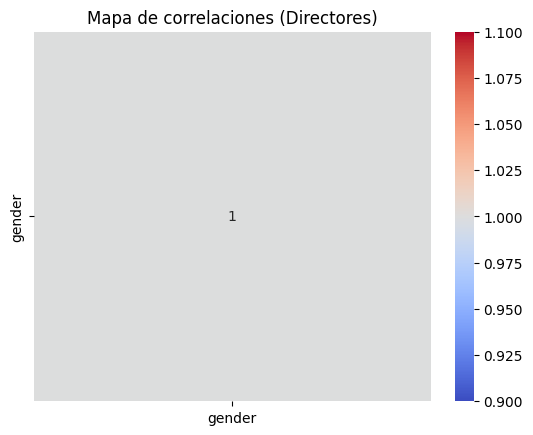

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\crew_desanidado.csv'
crew_df = pd.read_csv(file_path)

# Examinar el archivo
print("Primeras filas del dataset:")
print(crew_df.head())

print("\nTipos de datos:")
print(crew_df.dtypes)

print("\nValores nulos por columna:")
print(crew_df.isnull().sum())

# Distribución de departamentos
department_counts = crew_df['department'].value_counts()
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de departamentos')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Filtrar directores
directors_df = crew_df[crew_df['job'] == 'Director']

# Proporción de género en directores
gender_mapping = {0: 'Desconocido', 1: 'Femenino', 2: 'Masculino'}
directors_df['gender_label'] = directors_df['gender'].map(gender_mapping)

gender_counts = directors_df['gender_label'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['grey', 'pink', 'blue'], startangle=140)
plt.title('Distribución porcentual de género entre directores')
plt.ylabel('')
plt.show()

# Top 10 directores más prolíficos
top_directors = directors_df['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='purple')
plt.title('Top 10 directores más prolíficos')
plt.xlabel('Director')
plt.ylabel('Cantidad de películas dirigidas')
plt.xticks(rotation=45)
plt.show()

# Relación entre género y número de películas dirigidas
gender_movie_counts = directors_df.groupby('gender_label')['name'].count()
plt.figure(figsize=(8, 5))
gender_movie_counts.plot(kind='bar', color=['grey', 'pink', 'blue'])
plt.title('Cantidad de directores por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Directores')
plt.xticks(rotation=0)
plt.show()

# Correlaciones entre variables relevantes
sns.heatmap(directors_df[['gender']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones (Directores)')
plt.show()


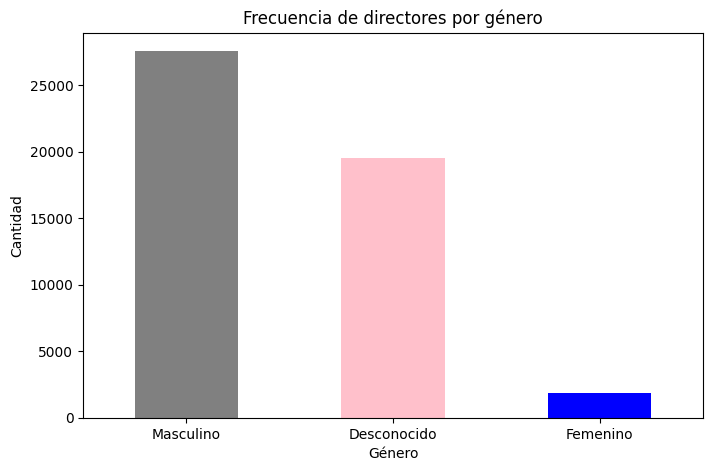

In [2]:
# Tabla de frecuencia por género para directores
gender_directors = directors_df['gender_label'].value_counts()
plt.figure(figsize=(8, 5))
gender_directors.plot(kind='bar', color=['grey', 'pink', 'blue'])
plt.title('Frecuencia de directores por género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


In [4]:
# Cargar archivos
movies_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\movies_datasetc.csv'
crew_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\crew_desanidado.csv'

movies_df = pd.read_csv(movies_path)
crew_df = pd.read_csv(crew_path)

# Verificar los tipos de 'movie_id'
print(f"Tipo de movie_id en movies_df: {movies_df['movie_id'].dtype}")
print(f"Tipo de movie_id en crew_df: {crew_df['movie_id'].dtype}")

# Convertir 'movie_id' al mismo tipo
movies_df['movie_id'] = movies_df['movie_id'].astype(str)
crew_df['movie_id'] = crew_df['movie_id'].astype(str)

# Realizar el merge
combined_df = pd.merge(crew_df, movies_df, on='movie_id', how='inner')

# Filtrar solo directores
directors_combined = combined_df[combined_df['job'] == 'Director']

# Verificar el resultado
print(directors_combined.head())


Tipo de movie_id en movies_df: object
Tipo de movie_id en crew_df: int64
    movie_id                 credit_id department  gender     id       job  \
0        862  52fe4284c3a36847f8024f49  Directing       2   7879  Director   
109     8844  52fe44bfc3a36847f80a7c7d  Directing       2   4945  Director   
122    15602  52fe466a9251416c75077a89  Directing       2  26502  Director   
126    31357  52fe44779251416c91011acb  Directing       2   2178  Director   
141    11862  52fe44959251416c75039eef  Directing       2  56106  Director   

                name    budget original_language  \
0      John Lasseter  30000000                en   
109     Joe Johnston  65000000                en   
122    Howard Deutch         0                en   
126  Forest Whitaker  16000000                en   
141    Charles Shyer         0                en   

                                              overview popularity  \
0    Led by Woody, Andy's toys live happily in his ...  21.946943   
109  Wh

In [5]:
# Cargar archivos
movies_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\movies_datasetc.csv'
crew_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\crew_desanidado.csv'

movies_df = pd.read_csv(movies_path)
crew_df = pd.read_csv(crew_path)

# Convertir 'movie_id' a string en ambos DataFrames
movies_df['movie_id'] = movies_df['movie_id'].astype(str)
crew_df['movie_id'] = crew_df['movie_id'].astype(str)

# Unir datasets por 'movie_id'
combined_df = pd.merge(crew_df, movies_df, on='movie_id', how='inner')

# Filtrar solo directores
directors_combined = combined_df[combined_df['job'] == 'Director']

# Verificar el resultado
print(directors_combined.head())


    movie_id                 credit_id department  gender     id       job  \
0        862  52fe4284c3a36847f8024f49  Directing       2   7879  Director   
109     8844  52fe44bfc3a36847f80a7c7d  Directing       2   4945  Director   
122    15602  52fe466a9251416c75077a89  Directing       2  26502  Director   
126    31357  52fe44779251416c91011acb  Directing       2   2178  Director   
141    11862  52fe44959251416c75039eef  Directing       2  56106  Director   

                name    budget original_language  \
0      John Lasseter  30000000                en   
109     Joe Johnston  65000000                en   
122    Howard Deutch         0                en   
126  Forest Whitaker  16000000                en   
141    Charles Shyer         0                en   

                                              overview popularity  \
0    Led by Woody, Andy's toys live happily in his ...  21.946943   
109  When siblings Judy and Peter discover an encha...  17.015539   
122  A fami

Estadísticas descriptivas del DataFrame combinado:
       movie_id                 credit_id  department         gender  \
count    465008                    465008      465008  465008.000000   
unique    44661                    463836          12            NaN   
top      135397  52fe4ac89251416c750edd47  Production            NaN   
freq        435                         9       94646            NaN   
mean        NaN                       NaN         NaN       0.760015   
std         NaN                       NaN         NaN       0.935622   
min         NaN                       NaN         NaN       0.000000   
25%         NaN                       NaN         NaN       0.000000   
50%         NaN                       NaN         NaN       0.000000   
75%         NaN                       NaN         NaN       2.000000   
max         NaN                       NaN         NaN       2.000000   

                  id       job            name  budget original_language  \
count   

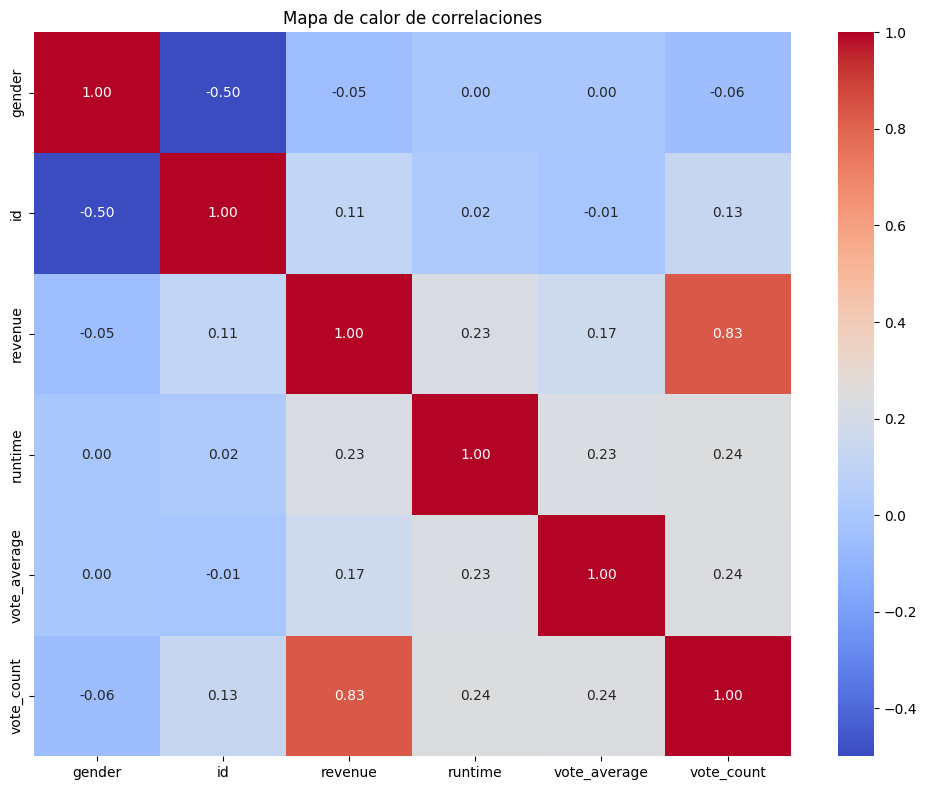

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estadísticas básicas del DataFrame combinado
print("Estadísticas descriptivas del DataFrame combinado:")
print(combined_df.describe(include='all'))  # Incluye estadísticas para todas las columnas

# Correlaciones numéricas
print("\nCorrelaciones entre las variables numéricas:")
numerical_columns = combined_df.select_dtypes(include=['number']).columns
correlation_matrix = combined_df[numerical_columns].corr()
print(correlation_matrix)

# Mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()


In [7]:
# Análisis de directores por género
gender_stats = directors_combined.groupby('gender').size()
print("\nDistribución por género de los directores:")
print(gender_stats)

# Correlación entre 'gender' y variables de la película (si aplica)
gender_movie_corr = directors_combined.groupby('gender')[['popularity', 'vote_average', 'revenue']].mean()
print("\nCorrelación promedio entre género y métricas de películas:")
print(gender_movie_corr)



Distribución por género de los directores:
gender
0    19592
1     1901
2    27627
dtype: int64


TypeError: agg function failed [how->mean,dtype->object]

In [8]:
# Convertir las columnas relevantes a numéricas (forzando errores a NaN)
columns_to_convert = ['popularity', 'vote_average', 'revenue']
for col in columns_to_convert:
    directors_combined[col] = pd.to_numeric(directors_combined[col], errors='coerce')

# Agrupar por 'gender' y calcular las medias de las métricas
gender_movie_corr = directors_combined.groupby('gender')[columns_to_convert].mean()

print("\nCorrelación promedio entre género y métricas de películas:")
print(gender_movie_corr)



Correlación promedio entre género y métricas de películas:
        popularity  vote_average       revenue
gender                                        
0         1.925621      5.508387  3.337030e+06
1         3.314642      5.774329  1.077390e+07
2         3.708434      5.759033  1.749648e+07


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10588\958491920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_combined[col] = pd.to_numeric(directors_combined[col], errors='coerce')
